In [1]:
import copy
import sys
sys.path.insert(0, "..")
from classes.regression.regressers import Pol_Regression, Ridge_Regression, pol_kernel_func
import numpy as np
import matplotlib.pyplot as plt

Product of the (X^T*X)^-1*(X^T*X) = I, for pol. order 3
[[1 0 0 0]
 [0 1 0 0]
 [0 0 0 0]
 [0 0 0 1]]
Product of the (X^T*X)^-1*(X^T*X) = I, for pol. order 5
[[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]]
Product of the (X^T*X)^-1*(X^T*X) = I, for pol. order 6
[[   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0]
 [   0    1    0    0    1    0    0]
 [   0    0    0    0    4    0    0]
 [   0    7    8   -4   14   -1    0]
 [   0   40  -23   -8   25   -9    0]
 [   0 -256  512    0    0  192  -16]]


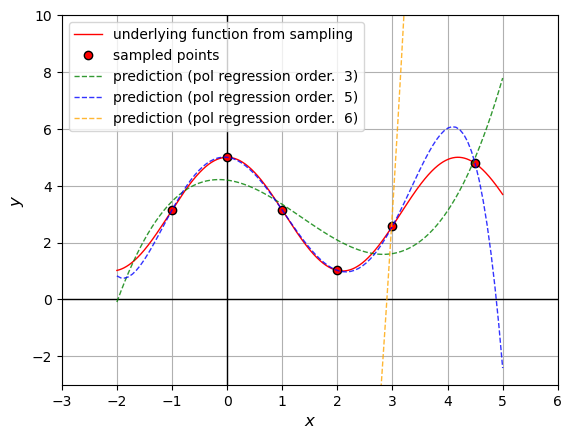

In [9]:
fig, ax = plt.subplots()
ax.grid()

ax.set_xlabel(r"$x$", fontsize=12)
ax.set_ylabel(r"$y$", fontsize=12)
ax.set_xlim([-3,6])
ax.set_ylim([-3,10])
ax.axhline(0, c="k", lw=1)
ax.axvline(0, c="k", lw=1)

def cos_func(xs, a=1.5,b=2.0,c=3.0):
    return c + b*np.cos(a*xs)

xs = np.linspace(-2,5, 1000)
x_tab = np.array([-1,0.0, 1, 2,3 ,4.5])
data = np.zeros(shape=(len(x_tab), 2))
data[:,0] = x_tab
data[:,1] = cos_func(x_tab)
ax.plot(xs, cos_func(xs), c='r', label="underlying function from sampling", lw=1)
ax.plot(data[:,0], data[:,1], 'o', c="r", label="sampled points", markeredgecolor="k")

degs = [3, 5, 6]
colors = ["g", "blue", "orange"]
x_data_sample = np.linspace(-2,5, 100)#np.random.rand(20)*7 - 2
for deg, color in zip(degs, colors):
    pol_reg = Pol_Regression(data=data, N_degs=deg)
    y_data_pred = pol_reg.sample(x_data=x_data_sample)
    ax.plot(x_data_sample, y_data_pred, c=color, ms=5, alpha=0.8, label=f"prediction (pol regression order.  {deg})", lw=1, ls="--")
    print(f"Product of the (X^T*X)^-1*(X^T*X) = I, for pol. order {deg}")
    X = pol_reg.X
    prod = np.dot(X.T, X)
    t1 = np.linalg.inv(prod)
    print(np.dot(prod, t1).astype(int))
s = ax.legend()

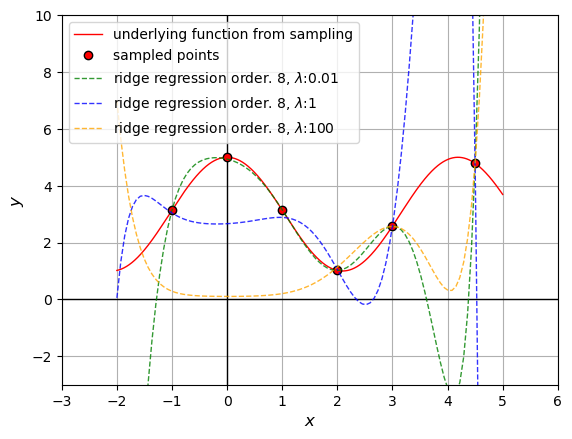

In [12]:
fig, ax = plt.subplots()
ax.grid()
ax.set_xlim([-3,6])
ax.set_ylim([-3,10])
ax.axhline(0, c="k", lw=1)
ax.axvline(0, c="k", lw=1)
ax.set_xlabel(r"$x$", fontsize=12)
ax.set_ylabel(r"$y$", fontsize=12)

def cos_func(xs, a=1.5,b=2.0,c=3.0):
    return c + b*np.cos(a*xs)

xs = np.linspace(-2,5, 1000)
x_tab = np.array([-1,0.0, 1, 2,3 ,4.5])
data = np.zeros(shape=(len(x_tab), 2))
data[:,0] = x_tab
data[:,1] = cos_func(x_tab)
ax.plot(xs, cos_func(xs), c='r', label="underlying function from sampling", lw=1)
ax.plot(data[:,0], data[:,1], 'o', c="r", label="sampled points", markeredgecolor="k")

lambs = [1e-2, 1, 100]
colors = ["g", "blue", "orange"]
x_data_sample = np.linspace(-2,5, 100)
for lamb, color in zip(lambs, colors):
    rid_reg = Ridge_Regression(data=data, N_degs=8, lamb=lamb)#Pol_Regression(data=data, N_deg=deg)
    y_data_pred = rid_reg.sample(x_data=x_data_sample)
    ax.plot(x_data_sample, y_data_pred, ms=5, alpha=0.8, c=color, label=rf"ridge regression order. 8, $\lambda$:{lamb}", lw=1, ls="--")

s = ax.legend()

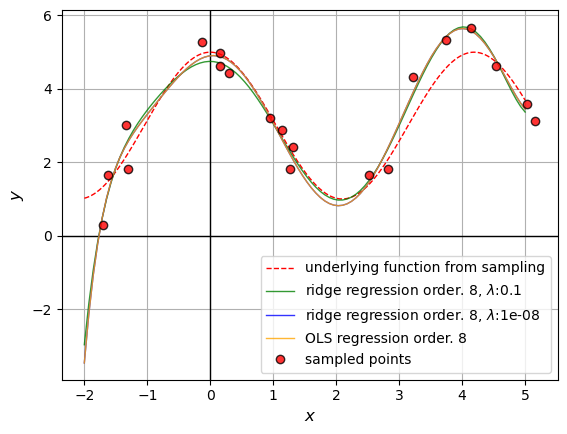

In [31]:
fig, ax = plt.subplots()
ax.grid()
ax.axhline(0, c="k", lw=1)
ax.axvline(0, c="k", lw=1)
ax.set_xlabel(r"$x$", fontsize=12)
ax.set_ylabel(r"$y$", fontsize=12)

def cos_func_noise(xs, a=1.5,b=2.0,c=3.0, sig=0.2):
    return c + b*np.cos(a*xs) + np.random.randn(len(xs))*np.sqrt(sig)

xs = np.linspace(-2,5, 1000)
x_tab = np.array([-1.5,0.0, 1,3 ,4.5])
x_noise = []
for x in x_tab:
    xs_noise = x + np.random.randn(4)*0.4
    x_noise.append(xs_noise)

x_tab = np.array(x_noise).reshape(int(4*len(x_tab)))
data = np.zeros(shape=(len(x_tab), 2))
data[:,0] = x_tab
data[:,1] = cos_func_noise(x_tab)
ax.plot(xs, cos_func(xs), c='r', label="underlying function from sampling", lw=1, ls="--")

lambs = [1e-1, 1e-8,]
colors = ["g", "blue"]
x_data_sample = np.linspace(-2,5, 100)
for lamb, color in zip(lambs, colors):
    rid_reg = Ridge_Regression(data=data, N_degs=8, lamb=lamb)#Pol_Regression(data=data, N_deg=deg)
    y_data_pred = rid_reg.sample(x_data=x_data_sample)
    ax.plot(x_data_sample, y_data_pred, c=color, ms=5, alpha=0.8, label=rf"ridge regression order. 8, $\lambda$:{lamb}", lw=1)

pol_reg = Pol_Regression(data=data, N_degs=8)
y_data_pred = pol_reg.sample(x_data=x_data_sample)
ax.plot(x_data_sample, y_data_pred, c="orange", ms=5, alpha=0.8, label=rf"OLS regression order. 8", lw=1)
ax.plot(data[:,0], data[:,1], 'o', c="r", label="sampled points", markeredgecolor="k", alpha=0.8)
ax.legend()